In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
# Load the data
df = pd.read_csv('finaldata.csv', index_col=0,parse_dates=[0],date_parser=parser)
df_20 = pd.read_csv('finaldata2020.csv', index_col=0,parse_dates=[0],date_parser=parser)
# A bit of pre-processing to make it nicer
#prc_only = df[['DateTime' , 'market_price[€/MWh]']]


# Plot the data
#prc_only.plot(figsize=(26, 6))
#plt.ylabel('Mmarket_price[€/MWh]')
#plt.xlabel('DateTime')
#plt.show(),
df.head(), df_20.head()

(                     Demand(MWh)  Wind prod(MWh)  solar_prod(MWh)  \
 DateTime                                                            
 2018-01-01 00:00:00     41305.75       32591.445              0.0   
 2018-01-01 01:00:00     39459.00       35791.755              0.0   
 2018-01-01 02:00:00     38436.75       39235.700              0.0   
 2018-01-01 03:00:00     38260.75       41785.180              0.0   
 2018-01-01 04:00:00     38562.00       43032.115              0.0   
 
                      Price(€/MWh)  Hour_  isWeekday_Saturday  \
 DateTime                                                       
 2018-01-01 00:00:00         -5.27    0.0                   0   
 2018-01-01 01:00:00        -29.99    1.0                   0   
 2018-01-01 02:00:00        -56.65    2.0                   0   
 2018-01-01 03:00:00        -63.14    3.0                   0   
 2018-01-01 04:00:00        -64.62    4.0                   0   
 
                      isWeekday_Sunday  isWeekday_W

In [3]:
prc_only = df[['Price(€/MWh)']]
prc_only_20 = df_20[['Price(€/MWh)']]
prc_only.head

<bound method NDFrame.head of                      Price(€/MWh)
DateTime                         
2018-01-01 00:00:00         -5.27
2018-01-01 01:00:00        -29.99
2018-01-01 02:00:00        -56.65
2018-01-01 03:00:00        -63.14
2018-01-01 04:00:00        -64.62
...                           ...
2019-12-31 19:00:00         46.00
2019-12-31 20:00:00         42.20
2019-12-31 21:00:00         39.74
2019-12-31 22:00:00         38.88
2019-12-31 23:00:00         37.39

[17520 rows x 1 columns]>

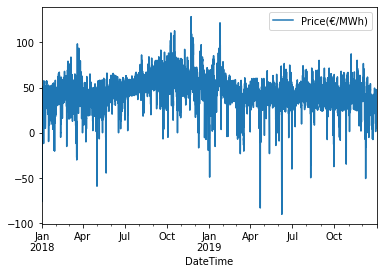

In [4]:
prc_only.plot()

Text(0.5, 1.0, 'Partial Autocorrelation Function')

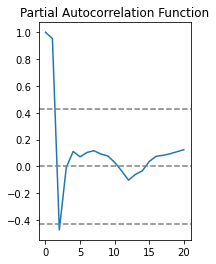

In [5]:
from statsmodels.graphics.tsaplots import plot_acf , pacf
plot_acf(prc_only)
lag_pacf = pacf(prc_only, nlags=20, method='ols')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

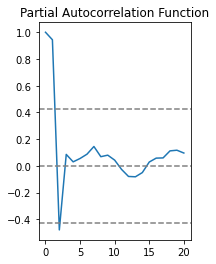

In [6]:
plot_acf(prc_only)
lag_pacf_20 = pacf(prc_only_20, nlags=20, method='ols')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_20)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf_20)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf_20)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

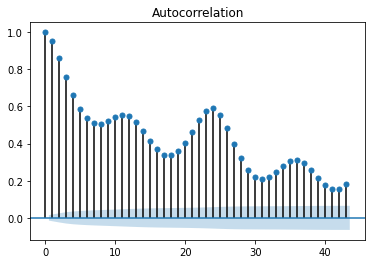

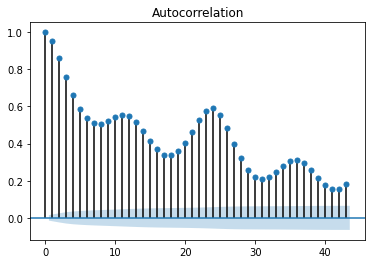

In [7]:
plot_acf(prc_only)

In [8]:
prc_diff =prc_only.diff(periods=1)
prc_diff_20= prc_only_20.diff(periods=1)

In [9]:
prc_diff = prc_diff[1:]
prc_diff_20 = prc_diff_20[1:]
prc_diff.head(),prc_diff_20

(                     Price(€/MWh)
 DateTime                         
 2018-01-01 01:00:00        -24.72
 2018-01-01 02:00:00        -26.66
 2018-01-01 03:00:00         -6.49
 2018-01-01 04:00:00         -1.48
 2018-01-01 05:00:00         -2.38,
                      Price(€/MWh)
 DateTime                         
 2020-01-01 01:00:00         -3.28
 2020-01-01 02:00:00         -2.05
 2020-01-01 03:00:00         -4.23
 2020-01-01 04:00:00         -1.47
 2020-01-01 05:00:00         -0.71
 ...                           ...
 2020-06-30 19:00:00          5.65
 2020-06-30 20:00:00          2.72
 2020-06-30 21:00:00         -0.56
 2020-06-30 22:00:00         -0.60
 2020-06-30 23:00:00         -3.34
 
 [4367 rows x 1 columns])

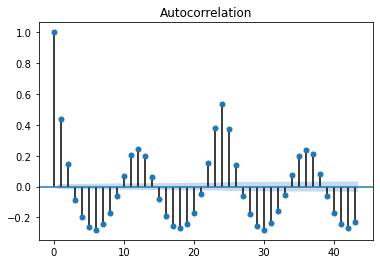

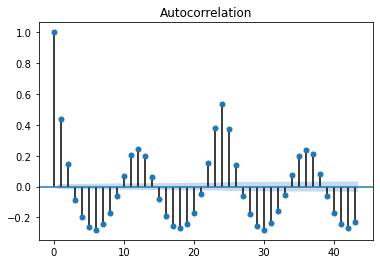

In [10]:
 plot_acf(prc_diff)

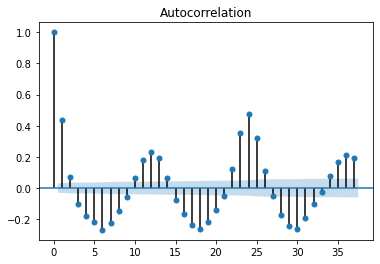

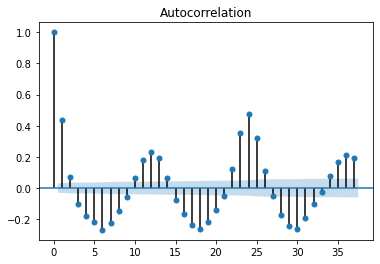

In [11]:
plot_acf(prc_diff_20)

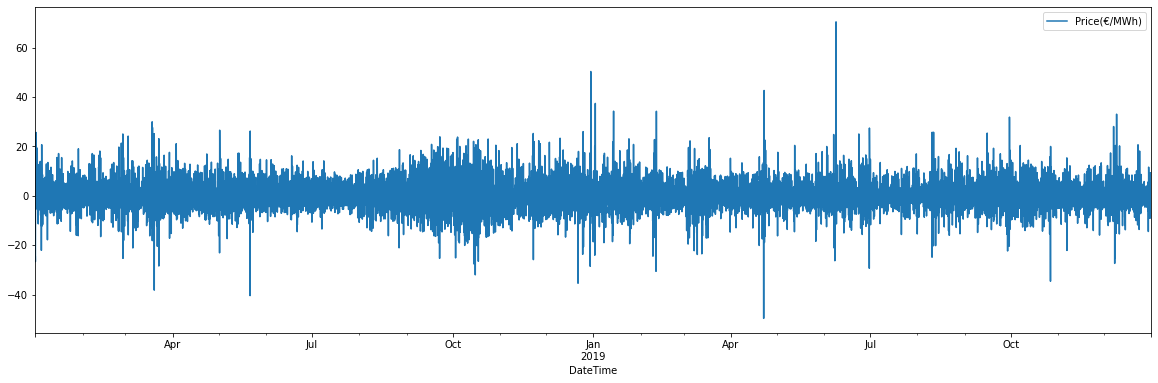

In [12]:
prc_diff.plot(figsize=(20,6))

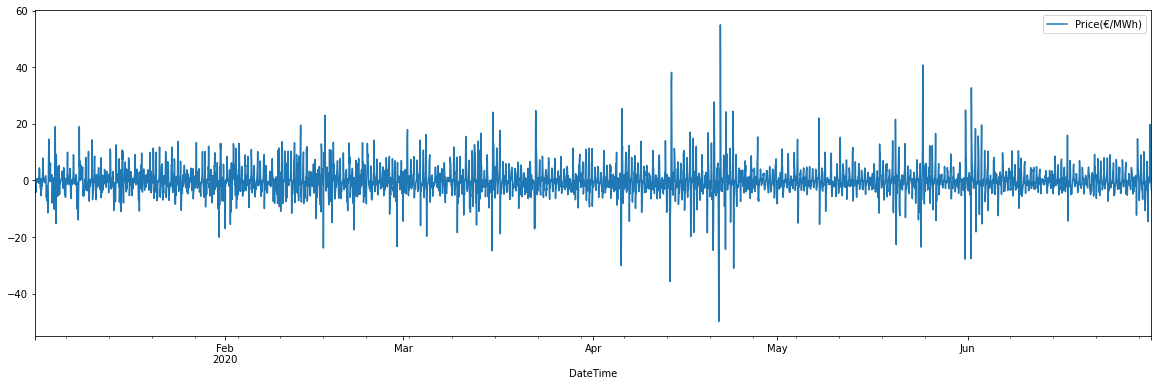

In [13]:
prc_diff_20.plot(figsize=(20,6))

In [14]:
X = prc_only.values
y=prc_only_20.values

train = X[0:14016] #  data as train data
test = X[14016:]  #  data as test data
test = y[0:]
predictions = []

In [15]:
X.size

17520

In [16]:
import warnings
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

C:\Users\nugad\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [17]:
predictions = model_ar_fit.predict(start=14016,end=17519)

In [18]:
predictions

array([30.58496133, 29.79044187, 29.91815432, ..., 42.43819872,
       42.43819872, 42.43819872])

In [19]:
test

array([[41.88],
       [38.6 ],
       [36.55],
       ...,
       [35.54],
       [34.94],
       [31.6 ]])

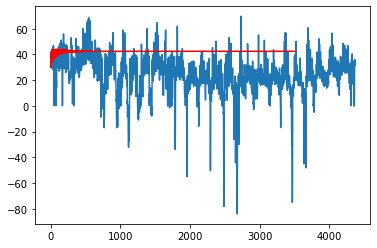

In [20]:
#AUTOREGRESSION AR MODEL
plt.plot(test)
plt.plot(predictions,color='red')

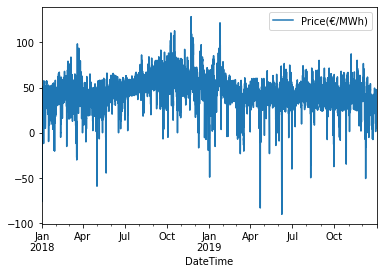

In [21]:
prc_only.plot()

In [22]:
#ARIMA MODEL 
from statsmodels.tsa.arima_model import ARIMA

In [128]:
#p,d,q  p = periods taken for autoregressive model (nine previous hours was taken)
#d -> Integrated order, difference optimal at (8,1,5) performs best other notable mentions are(11,1,11) (10,1,11) 
# q periods in moving average model
model_arima = ARIMA(train,order=(10, 1, 6)) #This also gives a good prediction line with a wide range for errors 
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

80262.9598662447


In [129]:
prediction = model_arima_fit.forecast(steps=4368)[0] #if you increase the steps, you get prediction of future hours hence 8760 would give the whole 2020 prediction, 
prediction

array([29.63137787, 28.61277619, 29.35124264, ..., 40.28990805,
       37.1550953 , 34.29556054])

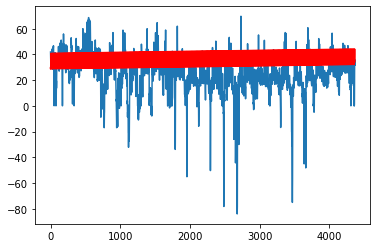

In [130]:
plt.plot(test)
plt.plot(prediction,color='red') #hope this is understandable

In [131]:
mean_squared_error(test,prediction) #8,1,5 had a lower MSE but the prediction line on the graph wasn't so premium, number of steps in prediction must be equal to test data number to ge able to obtain this value

391.7837437106577

In [132]:
from sklearn import metrics
#accuracy(prediction)
np.sqrt(mean_squared_error(test,prediction))

19.79352782377759

In [133]:
metrics.mean_absolute_error(test,prediction)

15.25399633278031

In [134]:
import itertools

p=d=q=range(0,12)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 0, 10),
 (0, 0, 11),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 1, 10),
 (0, 1, 11),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 2, 10),
 (0, 2, 11),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 3, 10),
 (0, 3, 11),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 4, 10),
 (0, 4, 11),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 5, 10),
 (0, 5, 11),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0,

In [135]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 120042.72525333095
(0, 0, 1) 104552.25016429825
(0, 0, 6) 84054.80347118774
(0, 0, 7) 83635.4863269316
(0, 0, 8) 83194.29809252369
(0, 0, 9) 82853.93135913674
(0, 0, 10) 82817.32377446728
(0, 0, 11) 82797.3925685998
(0, 1, 0) 86513.31644896611
(0, 1, 1) 84054.54366552155
(0, 1, 2) 83423.9261191762
(0, 1, 3) 83418.19019868756
(0, 1, 4) 83388.48556214999
(0, 1, 5) 83027.56854344034
(0, 1, 6) 82559.90820467085
(0, 1, 7) 82366.65561713606
(0, 1, 8) 82296.76723083772
(0, 1, 9) 82242.97099625101
(0, 1, 10) 82185.07399725882
(0, 1, 11) 82175.94103823528
(0, 2, 0) 88259.77617596554
(0, 2, 1) 87035.64802225659
(0, 2, 2) 84060.49031211033
(0, 2, 3) 83429.51143825802
(0, 2, 4) 83423.74394843722
(0, 2, 5) 83395.62642099688
(0, 2, 6) 83036.27663231865
(0, 2, 7) 82568.12698050673
(0, 2, 8) nan
(0, 2, 9) 82306.70736308125
(0, 2, 10) 82252.69627464376
(0, 2, 11) 82195.16550544807
(1, 0, 0) 86202.43917128583
(1, 0, 1) 83561.21692383851
(1, 0, 2) 82730.42647853948
(1, 0, 3) 82650.70885874447
(

(10, 0, 1) 81895.5703098533
(10, 0, 2) 80116.68406636124
(10, 0, 3) 80129.14220499399
(10, 0, 6) 79974.42769630719
(10, 0, 8) 79449.83579803504
(10, 0, 9) 79481.42596080202
(10, 0, 10) 79440.63386692893
(10, 0, 11) 79361.9995434349
(10, 1, 0) 82067.39502193933
(10, 1, 1) 82025.09046156167
(10, 1, 2) 80446.7432675896
(10, 1, 3) 80467.07813198373
(10, 1, 4) 80416.63603086001
(10, 1, 5) 80354.52979434341
(10, 1, 6) 80262.9598662447
(10, 1, 7) 80191.74111294502
(10, 1, 8) 80161.52823946466
(10, 1, 9) 79741.46286659795
(10, 1, 10) 79476.74783500665
(10, 1, 11) 79197.53844451546
(10, 2, 0) 83692.55863849676
(10, 2, 1) 82074.7077038582
(10, 2, 2) 82107.25232215773
(10, 2, 3) 81977.6191756834
(10, 2, 4) 81389.46675489152
(10, 2, 5) 81462.97872611732
(10, 2, 6) 81375.09484866819
(10, 2, 7) 80357.39897294715
(10, 2, 8) 80301.70793351418
(10, 2, 9) 80376.68329925113
(11, 0, 0) 81884.22175340922
(11, 0, 1) 81792.01368334614
(11, 0, 2) 80115.03783441037
(11, 0, 3) 80117.12003324126
(11, 0, 4) 80118

In [ ]:
residuals = model_arima_fit.resid 

In [ ]:
residuals.plot()